In [1]:
import re

rules = {  
    "EMI": [  
        r"emi", r"installment", r"zero percent emi", r"0% interest", r"paisa finance", r"down payment"  
    ],  
    "COD": [  
        r"\bcod\b", r"cash on delivery", r"pay later"  
    ],  
    "ORTHO_FEATURES": [  
        r"ortho", r"back problem", r"back pain", r"neck pain", r"slip disc", r"orthopaedic"  
    ],  
    "ERGO_FEATURES": [  
        r"ergo", r"ergonomic support", r"responsive foam"  
    ],  
    "COMPARISON": [  
        r"difference", r"compare", r"comparison", r"which mattress", r"mattress comparison"  
    ],  
    "WARRANTY": [  
        r"warranty", r"cover"  
    ],  
    "100_NIGHT_TRIAL_OFFER": [  
        r"100 night", r"trial", r"exchange"  
    ],  
    "SIZE_CUSTOMIZATION": [  
        r"custom size", r"customize", r"change size", r"size customization"  
    ],  
    "WHAT_SIZE_TO_ORDER": [  
        r"what size", r"size chart", r"available sizes", r"feet", r"inches", r"king size"  
    ],  
    "LEAD_GEN": [  
        r"call me", r"live agent", r"get in touch", r"schedule a callback", r"interested in buying", r"connect to an agent"  
    ],  
    "CHECK_PINCODE": [  
        r"check pincode", r"deliver to my pincode", r"delivery possible"  
    ],  
    "DISTRIBUTORS": [  
        r"showroom", r"distributors", r"retailers", r"offline stores"  
    ],  
    "MATTRESS_COST": [  
        r"price", r"cost", r"how much", r"rate", r"mrp"  
    ],  
    "PRODUCT_VARIANTS": [  
        r"product variants", r"mattress features", r"different products"  
    ],  
    "ABOUT_SOF_MATTRESS": [  
        r"about sof mattress", r"who are sof", r"sof mattress"  
    ],  
    "DELAY_IN_DELIVERY": [  
        r"delayed", r"why so long", r"not receive", r"so many days"  
    ],  
    "ORDER_STATUS": [  
        r"order status", r"track order", r"where is my order"  
    ],  
    "RETURN_EXCHANGE": [  
        r"return", r"refund", r"exchange", r"replace"  
    ],  
    "CANCEL_ORDER": [  
        r"cancel order", r"cancellation"  
    ],  
    "PILLOWS": [  
        r"pillows", r"cushions"  
    ],  
    "OFFERS": [  
        r"offers", r"discount", r"available offers", r"offer"
    ]  
}  

In [2]:
def classify_sentence(sentence, rules=rules):
    sentence_lower = sentence.lower()  
    for intent, patterns in rules.items():  
        for pattern in patterns:  
            if re.search(pattern, sentence_lower):  
                return intent  
    return "UNKNOWN"  # If no patterns match, return UNKNOWN  

In [3]:
import pandas as pd

df = pd.read_csv("../data/Tifin_Test_1/data/sofmattress_train.csv")

In [4]:
df

,sentence,label
0,You guys provide EMI option?,EMI
1,Do you offer Zero Percent EMI payment options?,EMI
2,0% EMI.,EMI
3,EMI,EMI
4,I want in installment,EMI
...,...,...
323,May I please know about the offers,OFFERS
324,Available offers,OFFERS
325,Is offer available,OFFERS
326,Want to know the discount,OFFERS


In [5]:
df['intent'] = df['sentence'].apply(classify_sentence)

In [11]:
accuracy = (df['intent'] == df['label']).mean()
print(f"Accuracy: {accuracy:.2f}")

# wrong classifications
wrong_df = df[df['intent'] != df['label']].reset_index(drop=True)
wrong_classification_count = wrong_df.shape[0]
print("Number of wrong classifications:", wrong_classification_count)

# wrong where predicted intent is UNKNOWN
unknown_count = (wrong_df['intent'] == 'UNKNOWN').sum()
print(f"Number of unknown intents: {unknown_count}")

# wrong where predicted intent is not UNKNOWN
wrong_count = (wrong_df['intent'] != 'UNKNOWN').sum()
print(f"Number of wrong intents: {wrong_count}")

Accuracy: 0.65
Number of wrong classifications: 116
Number of unknown intents: 103
Number of wrong intents: 13


In [12]:
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

report = classification_report(df['label'], df['intent'], zero_division=0)
print(report)

                       precision    recall  f1-score   support

100_NIGHT_TRIAL_OFFER       0.82      0.78      0.80        18
   ABOUT_SOF_MATTRESS       0.89      0.73      0.80        11
         CANCEL_ORDER       1.00      0.20      0.33        10
        CHECK_PINCODE       1.00      0.30      0.46        10
                  COD       1.00      1.00      1.00        12
           COMPARISON       0.88      0.64      0.74        11
    DELAY_IN_DELIVERY       1.00      0.55      0.71        11
         DISTRIBUTORS       1.00      0.35      0.52        34
                  EMI       1.00      1.00      1.00        25
        ERGO_FEATURES       1.00      1.00      1.00        11
             LEAD_GEN       1.00      0.57      0.73        21
        MATTRESS_COST       1.00      0.95      0.98        22
               OFFERS       0.83      1.00      0.91        10
         ORDER_STATUS       1.00      0.33      0.50        21
       ORTHO_FEATURES       0.82      0.82      0.82  

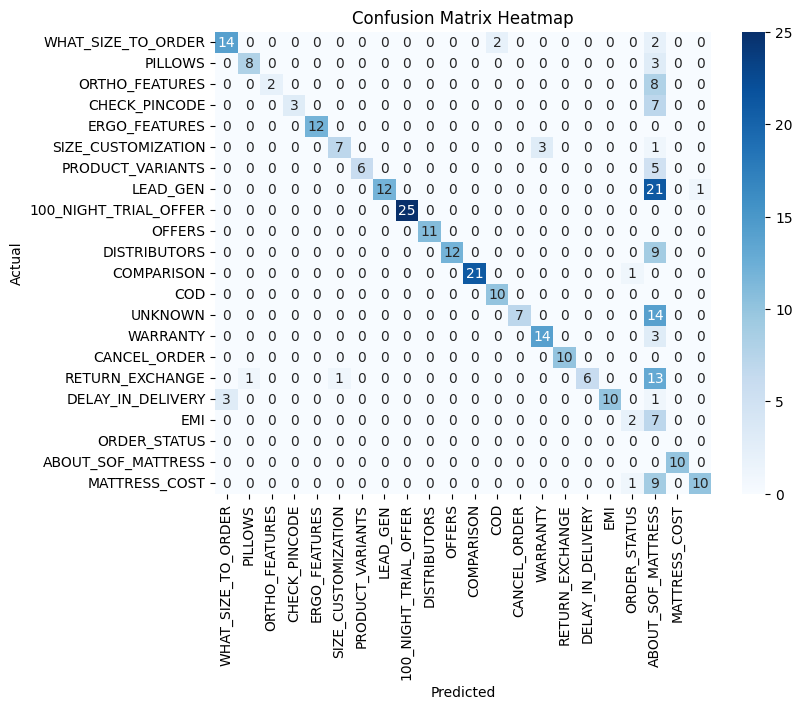

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df['label'], df['intent'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(df['label']), yticklabels=set(df['intent']))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [14]:
wrong_df[wrong_df['intent'] != 'UNKNOWN']

,sentence,label,intent
3,What is the difference between the Ergo & Orth...,COMPARISON,ORTHO_FEATURES
4,Difference between Ergo & Ortho Mattress,COMPARISON,ORTHO_FEATURES
6,Compare ergo & ortho variants,COMPARISON,ORTHO_FEATURES
7,What is the 100-night offer,100_NIGHT_TRIAL_OFFER,OFFERS
9,I want to check offers,100_NIGHT_TRIAL_OFFER,OFFERS
24,Want to know the custom size chart,WHAT_SIZE_TO_ORDER,SIZE_CUSTOMIZATION
45,What is the price for size (x ft x y ft)? What...,DISTRIBUTORS,WHAT_SIZE_TO_ORDER
66,Custom size cost,MATTRESS_COST,SIZE_CUSTOMIZATION
69,What are the SOF mattress products,PRODUCT_VARIANTS,ABOUT_SOF_MATTRESS
72,Which mattress is best,PRODUCT_VARIANTS,COMPARISON


## Findings after initial run

1. fix word boundaries. words like pin code was getting classified as "COD"
2. semantic sentance where exact keywords/regex patterns are not present are failing
3. using strict regexes instead of lousy ones will reduce the false positive rate.
4. majority of the cases which are failing are predicted as UNKNOWN. so if result is UNKNOWN, some other approach can be used.

In [42]:
wrong_df[:50]

,sentence,label,intent
49,back ache issue,ORTHO_FEATURES,UNKNOWN
51,Do we have anything for backache,ORTHO_FEATURES,UNKNOWN
52,I am cervical and Lombard section problem,ORTHO_FEATURES,UNKNOWN
65,What is the difference between the Ergo & Orth...,COMPARISON,ORTHO_FEATURES
66,Difference between Ergo & Ortho Mattress,COMPARISON,ORTHO_FEATURES
72,Is the mattress good for my back,COMPARISON,UNKNOWN
74,Compare ergo & ortho variants,COMPARISON,ORTHO_FEATURES
87,What is the 100-night offer,100_NIGHT_TRIAL_OFFER,OFFERS
95,Can I try a mattress first,100_NIGHT_TRIAL_OFFER,UNKNOWN
96,I want to check offers,100_NIGHT_TRIAL_OFFER,OFFERS
